In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test = pd.read_csv('test.csv')

In [6]:
conditions = [
    test['Name'].str.contains("Miss", case=False, na=False),
    test['Name'].str.contains("Mrs.", case=False, na=False),
    test['Name'].str.contains("Mr.", case=False, na=False)
]

In [7]:
condition = [
    df['Name'].str.contains("Miss", case=False, na=False),
    df['Name'].str.contains("Mrs.", case=False, na=False),
    df['Name'].str.contains("Mr.", case=False, na=False)
]

In [8]:
match = [1,2,3]
df['title'] = np.select(condition,match, default=0)

In [9]:
match = [1,2,3]
test['title'] = np.select(conditions,match, default=0)

In [10]:
df['title'].value_counts()

title
3    518
1    182
2    127
0     64
Name: count, dtype: int64

In [11]:
test['title'].value_counts()

title
3    240
1     78
2     72
0     28
Name: count, dtype: int64

In [12]:
dfe = df.copy()

In [13]:
df.drop(columns=['Name','SibSp','Parch','Cabin'],inplace=True)

In [14]:
test.drop(columns=['Name','SibSp','Parch','Cabin','Ticket'],inplace=True)

In [15]:
df.drop(['Ticket'],inplace=True,axis=1)

In [16]:
df

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,title
0,1,0,3,male,22.0,7.2500,S,3
1,2,1,1,female,38.0,71.2833,C,2
2,3,1,3,female,26.0,7.9250,S,1
3,4,1,1,female,35.0,53.1000,S,2
4,5,0,3,male,35.0,8.0500,S,3
...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,13.0000,S,0
887,888,1,1,female,19.0,30.0000,S,1
888,889,0,3,female,NaN,23.4500,S,1
889,890,1,1,male,26.0,30.0000,C,3


In [17]:
df

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,title
0,1,0,3,male,22.0,7.2500,S,3
1,2,1,1,female,38.0,71.2833,C,2
2,3,1,3,female,26.0,7.9250,S,1
3,4,1,1,female,35.0,53.1000,S,2
4,5,0,3,male,35.0,8.0500,S,3
...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,13.0000,S,0
887,888,1,1,female,19.0,30.0000,S,1
888,889,0,3,female,NaN,23.4500,S,1
889,890,1,1,male,26.0,30.0000,C,3


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   Fare         891 non-null    float64
 6   Embarked     889 non-null    object 
 7   title        891 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [19]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [20]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [21]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
lb1 = LabelEncoder()
le = lb.fit_transform(df[['Sex']])

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
df['sexx'] = le

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   Fare         891 non-null    float64
 6   Embarked     889 non-null    object 
 7   title        891 non-null    int64  
 8   sexx         891 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [24]:
le = lb1.fit_transform(df[['Embarked']])
df['emb'] = le

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [25]:
test['Sexx'] = lb.transform(test['Sex'])
test['emb'] = lb1.transform(test['Embarked'])

In [26]:
test

,PassengerId,Pclass,Sex,Age,Fare,Embarked,title,Sexx,emb
0,892,3,male,34.5,7.8292,Q,3,1,1
1,893,3,female,47.0,7.0000,S,2,0,2
2,894,2,male,62.0,9.6875,Q,3,1,1
3,895,3,male,27.0,8.6625,S,3,1,2
4,896,3,female,22.0,12.2875,S,2,0,2
...,...,...,...,...,...,...,...,...,...
413,1305,3,male,NaN,8.0500,S,3,1,2
414,1306,1,female,39.0,108.9000,C,0,0,0
415,1307,3,male,38.5,7.2500,S,3,1,2
416,1308,3,male,NaN,8.0500,S,3,1,2


In [27]:
test.drop(['Sex','Embarked'], axis=1,inplace=True)

In [28]:
df.drop(['Sex','Embarked'], axis=1,inplace=True)

In [29]:
test.head()

,PassengerId,Pclass,Age,Fare,title,Sexx,emb
0,892,3,34.5,7.8292,3,1,1
1,893,3,47.0,7.0000,2,0,2
2,894,2,62.0,9.6875,3,1,1
3,895,3,27.0,8.6625,3,1,2
4,896,3,22.0,12.2875,2,0,2


In [30]:
test[test.isnull().any(axis=1)]

,PassengerId,Pclass,Age,Fare,title,Sexx,emb
10,902,3,NaN,7.8958,3,1,2
22,914,1,NaN,31.6833,2,0,2
29,921,3,NaN,21.6792,3,1,0
33,925,3,NaN,23.4500,2,0,2
36,928,3,NaN,8.0500,1,0,2
...,...,...,...,...,...,...,...
408,1300,3,NaN,7.7208,1,0,1
410,1302,3,NaN,7.7500,1,0,1
413,1305,3,NaN,8.0500,3,1,2
416,1308,3,NaN,8.0500,3,1,2


In [31]:
test[test.isnull().any(axis=1)]

,PassengerId,Pclass,Age,Fare,title,Sexx,emb
10,902,3,NaN,7.8958,3,1,2
22,914,1,NaN,31.6833,2,0,2
29,921,3,NaN,21.6792,3,1,0
33,925,3,NaN,23.4500,2,0,2
36,928,3,NaN,8.0500,1,0,2
...,...,...,...,...,...,...,...
408,1300,3,NaN,7.7208,1,0,1
410,1302,3,NaN,7.7500,1,0,1
413,1305,3,NaN,8.0500,3,1,2
416,1308,3,NaN,8.0500,3,1,2


In [32]:
test[test['Fare'].isnull()]

,PassengerId,Pclass,Age,Fare,title,Sexx,emb
152,1044,3,60.5,NaN,3,1,2


In [33]:
test['Fare'].fillna(test['Fare'].mean , inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_25356\3580884329.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '<bound method Series.mean of 0        7.8292
1        7.0000
2        9.6875
3        8.6625
4       12.2875
         ...   
413      8.0500
414    108.9000
415      7.2500
416      8.0500
417     22.3583
Name: Fare, Length: 418, dtype: float64>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  test['Fare'].fillna(test['Fare'].mean , inplace=True)


In [34]:
test['Age'].fillna(test['Age'].median() , inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_25356\2304487776.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Age'].fillna(test['Age'].median() , inplace=True)


In [35]:
test.isnull().any()

PassengerId    False
Pclass         False
Age            False
Fare           False
title          False
Sexx           False
emb            False
dtype: bool

In [36]:
df.corr()

,PassengerId,Survived,Pclass,Age,Fare,title,sexx,emb
PassengerId,1.000000,-0.005007,-0.035144,0.036847,0.012658,0.040778,0.042939,0.013083
Survived,-0.005007,1.000000,-0.338481,-0.077221,0.257307,-0.431837,-0.543351,-0.163517
Pclass,-0.035144,-0.338481,1.000000,-0.369226,-0.549500,0.094232,0.131900,0.157112
Age,0.036847,-0.077221,-0.369226,1.000000,0.096067,0.323763,0.093254,-0.025252
Fare,0.012658,0.257307,-0.549500,0.096067,1.000000,-0.147176,-0.182333,-0.221226
title,0.040778,-0.431837,0.094232,0.323763,-0.147176,1.000000,0.617613,0.074179
sexx,0.042939,-0.543351,0.131900,0.093254,-0.182333,0.617613,1.000000,0.104057
emb,0.013083,-0.163517,0.157112,-0.025252,-0.221226,0.074179,0.104057,1.000000


In [37]:
df

,PassengerId,Survived,Pclass,Age,Fare,title,sexx,emb
0,1,0,3,22.0,7.2500,3,1,2
1,2,1,1,38.0,71.2833,2,0,0
2,3,1,3,26.0,7.9250,1,0,2
3,4,1,1,35.0,53.1000,2,0,2
4,5,0,3,35.0,8.0500,3,1,2
...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,13.0000,0,1,2
887,888,1,1,19.0,30.0000,1,0,2
888,889,0,3,NaN,23.4500,1,0,2
889,890,1,1,26.0,30.0000,3,1,0


In [38]:
test.rename(columns={'Sexx' : 'sexx'},inplace=True)

In [39]:
test

,PassengerId,Pclass,Age,Fare,title,sexx,emb
0,892,3,34.5,7.8292,3,1,1
1,893,3,47.0,7.0,2,0,2
2,894,2,62.0,9.6875,3,1,1
3,895,3,27.0,8.6625,3,1,2
4,896,3,22.0,12.2875,2,0,2
...,...,...,...,...,...,...,...
413,1305,3,27.0,8.05,3,1,2
414,1306,1,39.0,108.9,0,0,0
415,1307,3,38.5,7.25,3,1,2
416,1308,3,27.0,8.05,3,1,2


In [40]:
x_test = test[['Pclass','Fare','title','sexx','emb','Age']]


In [41]:
df['Age'].fillna(df['Age'].mean() , inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_25356\3516665944.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean() , inplace=True)


In [42]:
x = df[['Pclass','Fare','title','sexx','emb','Age']]
y = df['Survived']

In [43]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Fare    891 non-null    float64
 2   title   891 non-null    int64  
 3   sexx    891 non-null    int64  
 4   emb     891 non-null    int64  
 5   Age     891 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 41.9 KB


In [44]:
x

,Pclass,Fare,title,sexx,emb,Age
0,3,7.2500,3,1,2,22.000000
1,1,71.2833,2,0,0,38.000000
2,3,7.9250,1,0,2,26.000000
3,1,53.1000,2,0,2,35.000000
4,3,8.0500,3,1,2,35.000000
...,...,...,...,...,...,...
886,2,13.0000,0,1,2,27.000000
887,1,30.0000,1,0,2,19.000000
888,3,23.4500,1,0,2,29.699118
889,1,30.0000,3,1,0,26.000000


<Axes: >

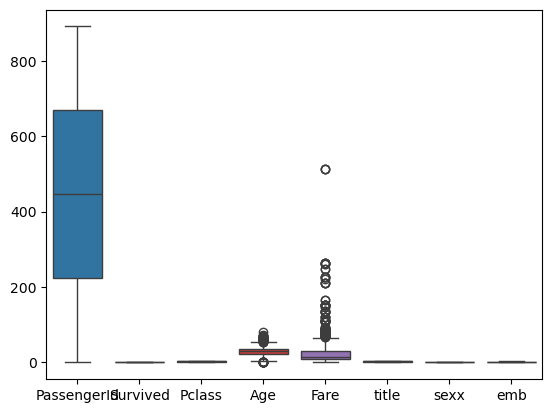

In [45]:
sns.boxplot(df)

In [46]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
scaled = std.fit_transform(x)

In [47]:
x_test.head(5)

,Pclass,Fare,title,sexx,emb,Age
0,3,7.8292,3,1,1,34.5
1,3,7.0,2,0,2,47.0
2,2,9.6875,3,1,1,62.0
3,3,8.6625,3,1,2,27.0
4,3,12.2875,2,0,2,22.0


In [48]:
type(x_test['Fare'])

pandas.core.series.Series

In [49]:
x_test['Fare'] = pd.to_numeric(x_test['Fare'],'coerce')

C:\Users\Admin\AppData\Local\Temp\ipykernel_25356\2206757681.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['Fare'] = pd.to_numeric(x_test['Fare'],'coerce')


In [50]:
x_test[x_test['Fare'].isnull() == True]


,Pclass,Fare,title,sexx,emb,Age
152,3,NaN,3,1,2,60.5


In [51]:
x_test.fillna(x_test['Fare'].mean(),inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_25356\845440791.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test.fillna(x_test['Fare'].mean(),inplace=True)


In [52]:
scaled_test = std.transform(x_test)

In [53]:
df_scaled_test = pd.DataFrame(scaled_test,columns=['Pclass','Fare','title','sexx','emb','Age'])

In [54]:
df_scaled_test.isnull().any()

Pclass    False
Fare      False
title     False
sexx      False
emb       False
Age       False
dtype: bool

In [55]:
df_scaled_test.fillna(df_scaled_test['Fare'].mean(),inplace=True)

In [56]:
df_scaled = pd.DataFrame(scaled,columns=['Pclass','Fare','title','sexx','emb','Age'])

In [57]:
df_scaled.isnull().any(axis=1)

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [58]:
df_scaled

,Pclass,Fare,title,sexx,emb,Age
0,0.827377,-0.502445,0.759578,0.737695,0.581114,-0.592481
1,-1.566107,0.786845,-0.231321,-1.355574,-1.938460,0.638789
2,0.827377,-0.488854,-1.222219,-1.355574,0.581114,-0.284663
3,-1.566107,0.420730,-0.231321,-1.355574,0.581114,0.407926
4,0.827377,-0.486337,0.759578,0.737695,0.581114,0.407926
...,...,...,...,...,...,...
886,-0.369365,-0.386671,-2.213117,0.737695,0.581114,-0.207709
887,-1.566107,-0.044381,-1.222219,-1.355574,0.581114,-0.823344
888,0.827377,-0.176263,-1.222219,-1.355574,0.581114,0.000000
889,-1.566107,-0.044381,0.759578,0.737695,-1.938460,-0.284663


In [59]:
df_scaled_test

,Pclass,Fare,title,sexx,emb,Age
0,0.827377,-0.490783,0.759578,0.737695,-0.678673,0.369449
1,0.827377,-0.507479,-0.231321,-1.355574,0.581114,1.331378
2,-0.369365,-0.453367,0.759578,0.737695,-0.678673,2.485693
3,0.827377,-0.474005,0.759578,0.737695,0.581114,-0.207709
4,0.827377,-0.401017,-0.231321,-1.355574,0.581114,-0.592481
...,...,...,...,...,...,...
413,0.827377,-0.486337,0.759578,0.737695,0.581114,-0.207709
414,-1.566107,1.544246,-2.213117,-1.355574,-1.938460,0.715743
415,0.827377,-0.502445,0.759578,0.737695,0.581114,0.677266
416,0.827377,-0.486337,0.759578,0.737695,0.581114,-0.207709


In [60]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

In [61]:
x.isnull().any()


Pclass    False
Fare      False
title     False
sexx      False
emb       False
Age       False
dtype: bool

In [62]:
log.fit(df_scaled,y)

LogisticRegression()

In [63]:
df_scaled_test.isnull().any(axis=0)

Pclass    False
Fare      False
title     False
sexx      False
emb       False
Age       False
dtype: bool

In [64]:
df_scaled_test[df_scaled_test['Fare'].isnull()]

,Pclass,Fare,title,sexx,emb,Age


In [65]:
y_pred = log.predict(df_scaled_test)

In [66]:
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [68]:
t = pd.read_csv('test.csv')

In [69]:
t.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [70]:
fi = pd.DataFrame(data=[t['PassengerId'],y_pred])

In [ ]:
fi = fi.T 

In [72]:
fi

,PassengerId,Unnamed 0
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [73]:
fi.rename(columns={'Unnamed 0' :'Survived'},inplace=True)

In [74]:
fi.to_csv('fia.csv',index=False)

In [75]:
from sklearn.svm import SVC
svc = SVC()

### Using SVM support vector machine 

In [93]:
df_scaled

,Pclass,Fare,title,sexx,emb,Age
0,0.827377,-0.502445,0.759578,0.737695,0.581114,-0.592481
1,-1.566107,0.786845,-0.231321,-1.355574,-1.938460,0.638789
2,0.827377,-0.488854,-1.222219,-1.355574,0.581114,-0.284663
3,-1.566107,0.420730,-0.231321,-1.355574,0.581114,0.407926
4,0.827377,-0.486337,0.759578,0.737695,0.581114,0.407926
...,...,...,...,...,...,...
886,-0.369365,-0.386671,-2.213117,0.737695,0.581114,-0.207709
887,-1.566107,-0.044381,-1.222219,-1.355574,0.581114,-0.823344
888,0.827377,-0.176263,-1.222219,-1.355574,0.581114,0.000000
889,-1.566107,-0.044381,0.759578,0.737695,-1.938460,-0.284663


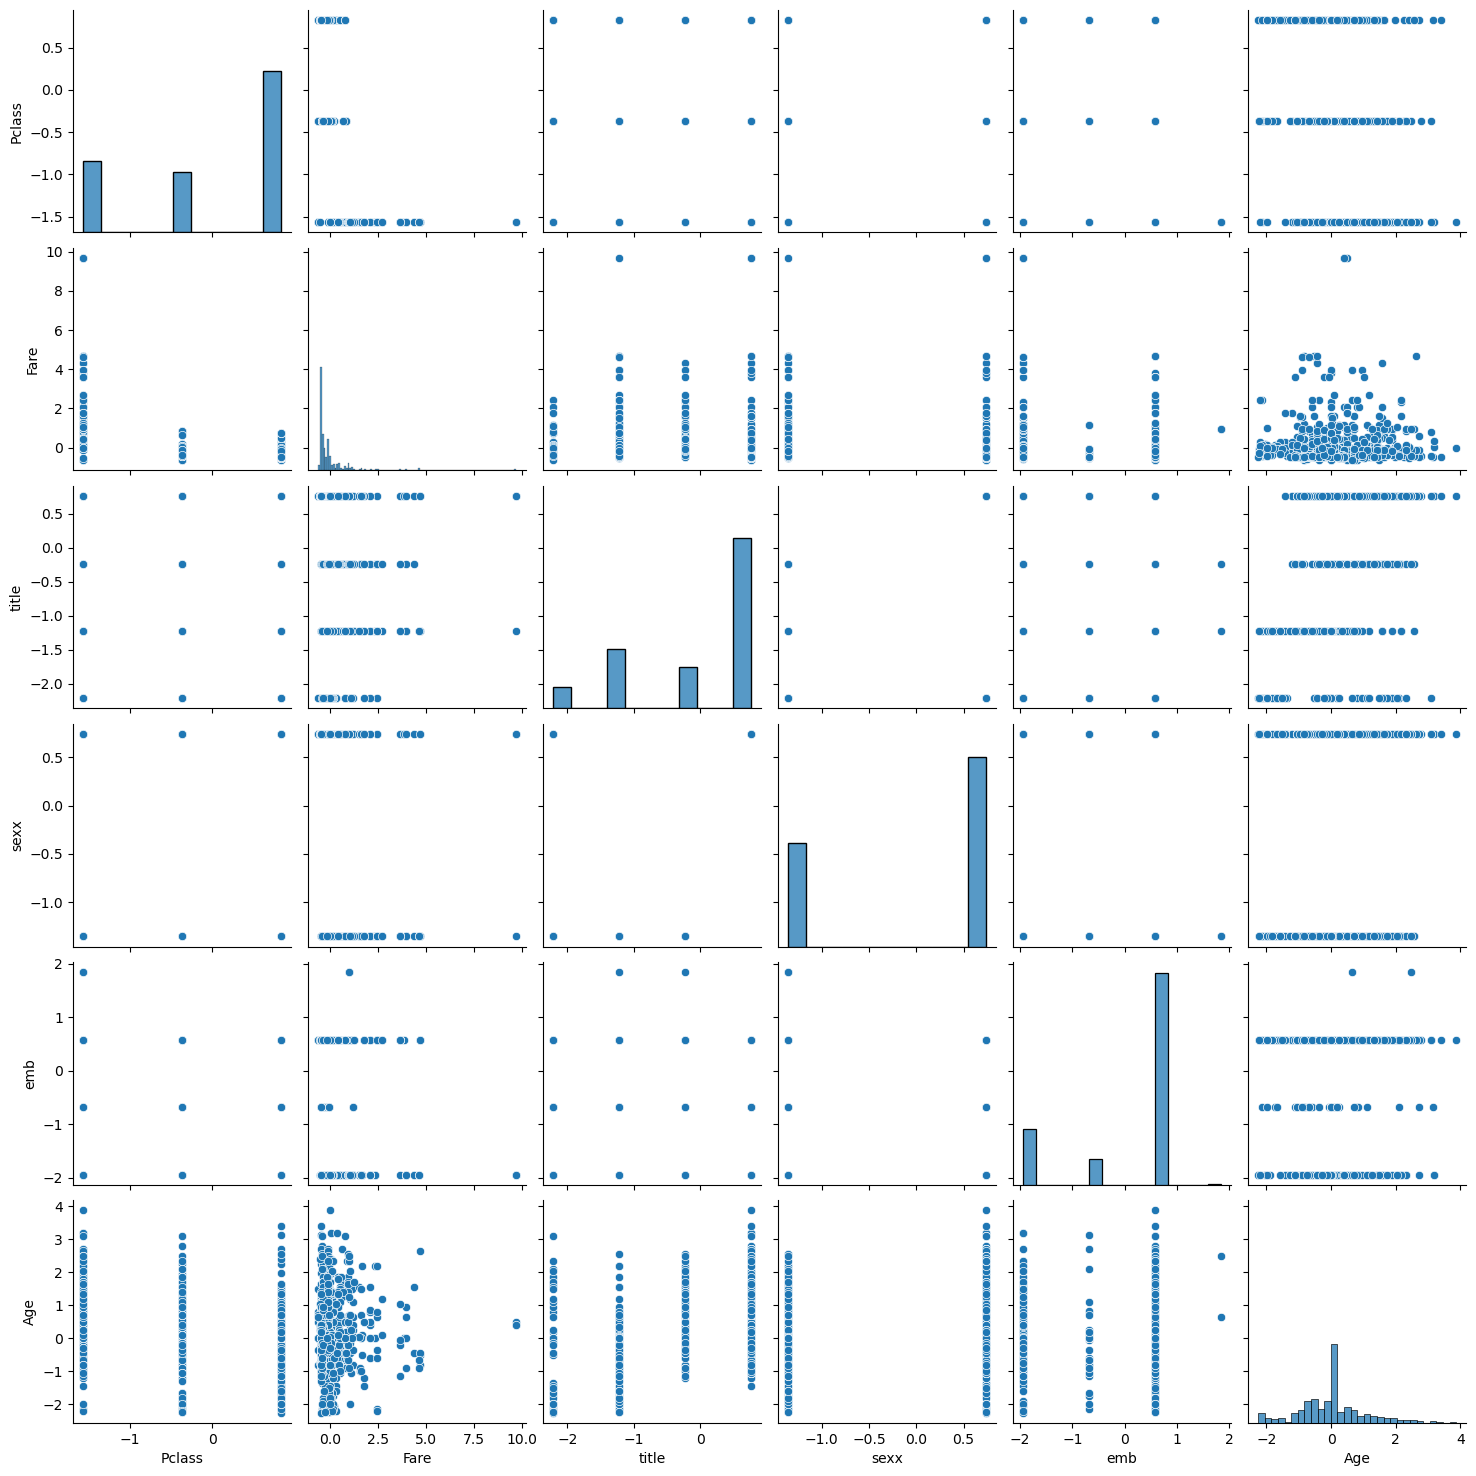

In [94]:
sns.pairplot(df_scaled)

In [76]:
svc.fit(df_scaled,y)

SVC()

In [77]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y,svc.predict(df_scaled)))

0.8316498316498316


In [78]:
y_p = svc.predict(df_scaled_test)

In [84]:
svcc = pd.DataFrame({'PassengerId' : t['PassengerId'], 'Survived': y_p})

In [104]:
svcc.to_csv('svcc.csv',index=False)

#### Random forest 

In [87]:
from sklearn.ensemble import RandomForestClassifier
rand = RandomForestClassifier()

In [88]:
rand.fit(df_scaled,y)

RandomForestClassifier()

In [89]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y,rand.predict(df_scaled)))

0.9820426487093153


In [90]:
y_ra = rand.predict(df_scaled_test)

In [91]:
randd = pd.DataFrame({'PassengerId' : t['PassengerId'], 'Survived': y_ra})

In [105]:
randd.to_csv('randd.csv',index=False)

#### Naiye baye's model

In [95]:
from sklearn.naive_bayes import BernoulliNB
nb = BernoulliNB()

In [96]:
nb.fit(df_scaled,y)

BernoulliNB()

In [98]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y,nb.predict(df_scaled)))

0.7878787878787878


In [101]:
nbb.reset_index(drop=True)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [103]:
nbb.columns

Index(['PassengerId', 'Survived'], dtype='object')

In [108]:
y_nb = nb.predict(df_scaled_test)



In [110]:
nbb = pd.DataFrame({'PassengerId' : t['PassengerId'], 'Survived': y_nb})

In [111]:

nbb.to_csv('nb.csv',index=False)